In [1]:
# Constants for the earth-sun system
time = 0
maxTime = 365 * 24 * 60 * 60

xpositions = [0, 1.5e11]
ypositions = [0, 0]
zpositions = [0, 0]

xvelocities = [0, 0]
yvelocities = [0, 15000] #29722
zvelocities = [0, 0]

masses = [1.989e30, 5.9722e24]

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-11

In [2]:
# Function to generate cluster properties
def generateCluster(numberOfStars, clusterRadius, alpha, driftVelocity):
    # Setting the random seed
    #np.random.seed(seed)

    # Generating a number of random values of x, y and z in a square of radius R
    xCandidates = 2*clusterRadius*np.random.random(numberOfStars*5) - clusterRadius
    yCandidates = 2*clusterRadius*np.random.random(numberOfStars*5) - clusterRadius
    zCandidates = 2*clusterRadius*np.random.random(numberOfStars*5) - clusterRadius

    # Creating empty array for star r positions
    rValues = np.array([], dtype=np.float64)
    xValues = np.array([], dtype=np.float64)
    yValues = np.array([], dtype=np.float64)
    zValues = np.array([], dtype=np.float64)

    # Turning these into array elements
    for i in range(len(xCandidates)):
        # Truth testing if star lies in right range
        if np.sqrt(xCandidates[i]**2+yCandidates[i]**2+zCandidates[i]**2) < clusterRadius:
            # Adding the successful values to the arrays
            rValues = np.append(rValues,[xCandidates[i], yCandidates[i], zCandidates[i]])
            xValues = np.append(xValues, xCandidates[i])
            yValues = np.append(yValues, yCandidates[i])
            zValues = np.append(zValues, zCandidates[i])
        else:
            pass

    # Only taking the first N values of the array
    xValues = xValues[:numberOfStars]
    yValues = yValues[:numberOfStars]
    zValues = zValues[:numberOfStars]

    # Generating the masses of the cluster componenets
    #masses = np.ones(numberOfStars)*1.9e30*np.random.random(numberOfStars)
    masses = np.random.lognormal(np.log(0.079),0.69, numberOfStars) * 1.989e30

    # Finding the centre of mass of the system
    totalMass = np.sum(masses)
    comX = np.sum(xValues*masses)/totalMass
    comY = np.sum(yValues*masses)/totalMass
    comZ = np.sum(zValues*masses)/totalMass

    # Correcting so that Centre of Masses lies at 0,0,0
    xValuesCentered = xValues - comX
    yValuesCentered = yValues - comY
    zValuesCentered = zValues - comZ

    # Determining GPE of the system
    GPE = 0

    for i in range(numberOfStars):
        ri = np.array([xValuesCentered[i], yValuesCentered[i], zValuesCentered[i]])
        for j in range(numberOfStars):
            if i==j:
                pass
            else:
                rj = np.array([xValuesCentered[j], yValuesCentered[j], zValuesCentered[j]])
                rij = np.linalg.norm(ri-rj)
                GPE += masses[i]*masses[j]*G/rij

    # Generating some random velocities
    vx = 2*np.random.random(numberOfStars) - 1
    vy = 2*np.random.random(numberOfStars) - 1
    vz = 2*np.random.random(numberOfStars) - 1

    # Determining the centre of velocity
    comVX = np.sum(vx*masses)/totalMass
    comVY = np.sum(vy*masses)/totalMass
    comVZ = np.sum(vz*masses)/totalMass

    # Centering the velocities
    vxCentered = vx - comVX
    vyCentered = vy - comVY
    vzCentered = vz - comVZ

    # Determining the KE
    v = vxCentered**2 + vyCentered**2 + vzCentered**2
    KE = np.sum(0.5*masses*v)

    # Finding how KE and G are related
    KEscale = GPE/(alpha*KE)
    
    # Scaling the velocities
    vxCorrected = vx*np.sqrt(KEscale)
    vyCorrected = vy*np.sqrt(KEscale)
    vzCorrected = vz*np.sqrt(KEscale)

    # Adding on a random drift velocity in some direction
    driftX = driftVelocity*(2*np.random.random(1)-1)
    driftY = driftVelocity*(2*np.random.random(1)-1)
    driftZ = driftVelocity*(2*np.random.random(1)-1)

    vxCentered = vxCentered + driftX
    vyCentered = vyCentered + driftY
    vzCentered = vzCentered + driftZ

    # Returning the values
    return xValuesCentered, yValuesCentered, zValuesCentered, vxCorrected, vyCorrected, vzCorrected, masses


(array([ 753., 1405., 1903., 2072., 1656., 1122.,  687.,  275.,   98.,
          29.]),
 array([9.86688467e+14, 4.53878185e+16, 8.97889485e+16, 1.34190078e+17,
        1.78591208e+17, 2.22992338e+17, 2.67393468e+17, 3.11794598e+17,
        3.56195728e+17, 4.00596858e+17, 4.44997988e+17]),
 <BarContainer object of 10 artists>)

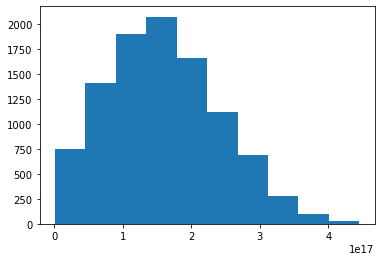

In [58]:
_, _, _, x,y,z, _ = generateCluster(10000, 1000000, 2, 0)

plt.hist(x*x+y*y+z*z)

In [4]:
def outputICs(time, maxTime, xpositions, ypositions, zpositions, xvelocities, yvelocities, zvelocities, masses):
    # Defining the name of the file
    fname = "simData.txt"

    # Opening the file
    with open(fname, "w") as file:
        
        # Writing the headers
        file.write("Time MaxTime Xpos Ypos Zpos Xvel Yvel Zvel Mass \n")

        numberOfObjects = len(xpositions)

        # Looping through each object 
        for i in range(numberOfObjects):
            file.write(str(time) + " " + str(maxTime) + " ")
            file.write(str(xpositions[i]) + " " + str(ypositions[i]) + " " + str(zpositions[i]) + " ")
            file.write(str(xvelocities[i]) + " " + str(yvelocities[i]) + " " + str(zvelocities[i]) + " ")
            file.write(str(masses[i]) + "\n") 

In [5]:
# Generating a line of clusters
def fillamentGenerator(numberOfClusters, clusterSeparation, clusterStarNumber, clusterRadius, alpha, driftVelocity):

    # Generating the offset direction
    clusterDirectionX = 2*np.random.random(numberOfClusters)-1
    clusterDirectionY = 2*np.random.random(numberOfClusters)-1
    clusterDirectionZ = 2*np.random.random(numberOfClusters)-1
    clusterDirections = []

    # Creating the master offset 
    offsets = np.arange(1, numberOfClusters+1, 1)
    offsets = offsets * clusterSeparation

    for i in range(numberOfClusters):
        normalisationConstant = np.sqrt(clusterDirectionX[i]**2 + clusterDirectionY[i]**2 +  clusterDirectionZ[i]**2)
        offset = normalisationConstant * offsets[i]
        clusterDirections.append([offset*clusterDirectionX[i], offset*clusterDirectionY[i], offset*clusterDirectionZ[i]])

    # Defining arrays
    x = []; y = []; z = []; vx = []; vy = []; vz = []; m = []

    # Generating the clusters and offsetting them
    for i in range(numberOfClusters):
        xpos, ypos, zpos, vxs, vys, vzs, ms = generateCluster(clusterStarNumber, clusterRadius, alpha, driftVelocity)
        adjuster = clusterDirections[i]
        for j in range(len(xpos)):
            x.append(xpos[j]+adjuster[0])
            y.append(ypos[j]+adjuster[1])
            z.append(zpos[j]+adjuster[2])
        
            vx.append(vxs[i])
            vy.append(vys[i])
            vz.append(vzs[i])
            m.append(ms[i])

    return x, y, z, vx, vy, vz, m

def generateCylindricalFilament(numberOfClusters, clusterSeparation, clyinderRadius, clusterStarNumber, clusterRadius, alpha, driftVelocity):

    # Setting the central axis values
    clusterPositions = np.arange(0, numberOfClusters, 1)
    zValues = clusterPositions * clusterSeparation

    # Calculating the x and y values
    xValues = 2*np.random.random(numberOfClusters*2) - 1
    yValues = 2*np.random.random(numberOfClusters*2) - 1

    # Getting the ones that lie in the radius we want
    xValuesList = xValues[np.sqrt(xValues**2 + yValues**2) < 1]
    yValuesList = yValues[np.sqrt(xValues**2 + yValues**2) < 1]
    
    # Getting the right number of values
    xValuesChosen = xValuesList * clyinderRadius
    yValuesChosen = yValuesList * clyinderRadius

    # Setting the offsets
    clusterOffsets = []
    for i in range(numberOfClusters):
        clusterOffsets.append([xValuesChosen[i],yValuesChosen[i],zValues[i]])

    # Generating the right number of clusters and positioning them
    x = []; y = []; z = []; vx = []; vy = []; vz = []; m = []

    for i in range(numberOfClusters):
        xpos, ypos, zpos, vxs, vys, vzs, ms = generateCluster(clusterStarNumber, clusterRadius, alpha, driftVelocity)
        adjuster = clusterOffsets[i]

        for j in range(len(xpos)):
            x.append(xpos[j]+adjuster[0])
            y.append(ypos[j]+adjuster[1])
            z.append(zpos[j]+adjuster[2])
        
            vx.append(vxs[i])
            vy.append(vys[i])
            vz.append(vzs[i])
            m.append(ms[i])

    return x, y, z, vx, vy, vz, m

In [6]:
x, y, z, vx, vy, vz, m = generateCluster(5, 100e11, 2, 0)

outputICs(0, 60*60*24*365*1000, x, y, z, vx, vy, vz, m)

NameError: name 'np' is not defined

In [2]:
# Generating some example clusters for plotting
x, y, z, vx, vy, vz, m = generateCylindricalFilament(5, 10000e11, 5000e11, 5, 100e11, 2, 200)

# Plotting
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
plt.plot(x, y, z, "bo", markersize=5)
plt.xlabel("x, m")
plt.ylabel("y, m")
ax.set_zlabel("z, m")
plt.xlim(0.5*-1*max(z), 0.5*1*max(z))
plt.ylim(0.5*-1*max(z), 0.5*1*max(z))

plt.figure()
plt.hist(np.sqrt(vx**2 + vy**2 + vz**2))
plt.xlabel("|Velocity|, m/s")
plt.ylabel("Frequency")

NameError: name 'generateCylindricalFilament' is not defined

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
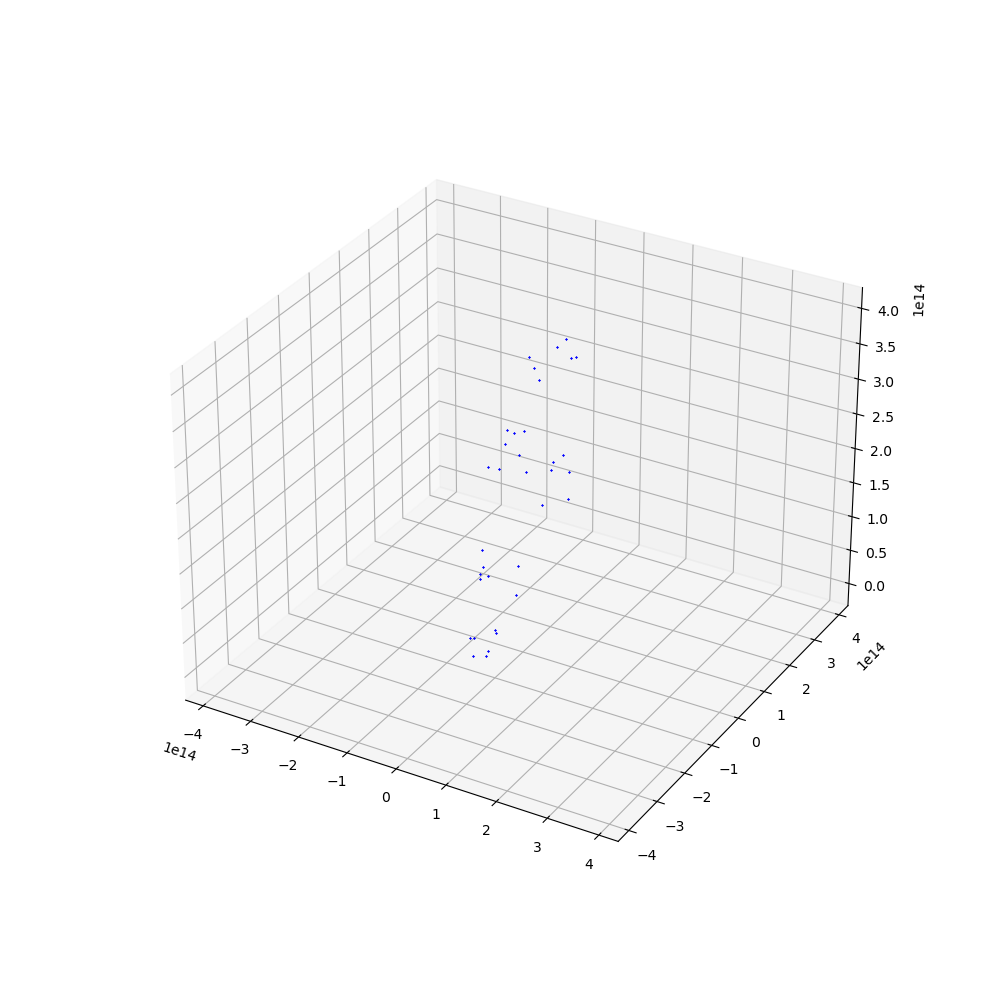

In [28]:
# Generating the desired initial conditions
nc = 5 # number of clusters
cs = 1000e11 # cluster separation / fillament cluster separation
cr = 1000e11 # fillament cylinder radius
ns = 7 # stars per cluster
sr = 500e11 # cluster spherical radius
a = 2 # alpha
dr = 200 # drift velocity
t = 60*60*24*364*1000 # time to iterate for

x, y, z, vx, vy, vz, m = generateCylindricalFilament(nc, cs, cr, ns, sr, a, dr)

# Plotting the stars for visualisation
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
plt.plot(x, y, z, "bx", markersize=1)

plt.ylim((-max(z),max(z)))
plt.xlim((-max(z),max(z)))

# Saving the star data to a file
outputICs(0,t,x,y,z,vx,vy,vz,m)

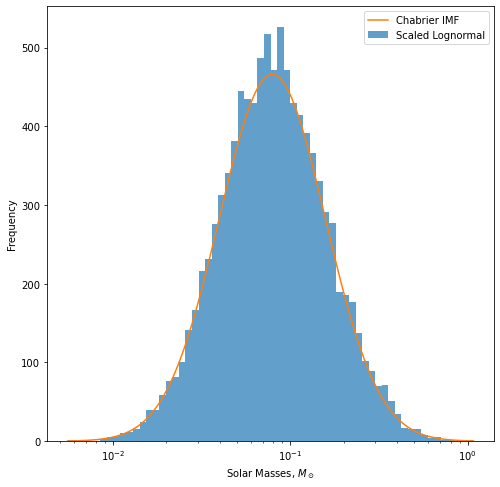

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the initial mass function
m = np.random.lognormal(np.log(0.079),0.69, 10000)

plt.figure(figsize=(8,8))
_, bins = np.histogram(np.log10(m), bins='auto')
plt.hist(m, bins=10**bins, label="Scaled Lognormal", alpha=0.7)

plt.xlabel("Solar Masses, $M_\\odot$")
plt.ylabel("Frequency")

x = np.linspace(min(m), max(m), 10000)
y = 5100*(0.158/(0.69*np.sqrt(2*np.pi))) * np.exp(-((np.log(x)-np.log(0.079))**2)/(2*0.69**2))


plt.plot(x, y, label="Chabrier IMF")
plt.legend(loc="best")
#plt.yscale("log")
plt.xscale("log")
plt.savefig("massGenerator.png", dpi="figure")


(array([ 988., 1008., 1012.,  992.,  937., 1047., 1008.,  975.,  994.,
        1039.]),
 array([1.91590772e-04, 1.00157020e-01, 2.00122449e-01, 3.00087877e-01,
        4.00053306e-01, 5.00018735e-01, 5.99984164e-01, 6.99949593e-01,
        7.99915022e-01, 8.99880451e-01, 9.99845880e-01]),
 <BarContainer object of 10 artists>)

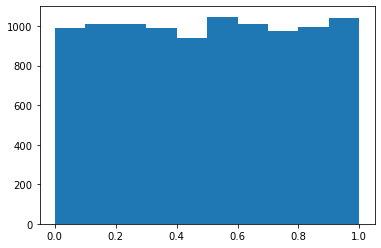

In [53]:
plt.hist(np.random.random(10000))